# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC),**wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year.** The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions

**What are some purposes of EDA before constructing a multiple linear regression model?**


Purposes of EDA before constructing a multiple linear regression model:

**Understanding the Data:**

Descriptive stats: Explore central tendency, spread, and distribution of variables (mean, median, standard deviation, histograms).
Visualizations: Use scatter plots, box plots, etc. to see relationships, patterns, and outliers.

**Checking Assumptions:**

Linearity: Assess linearity with scatter plots.
Normality: Check residual normality with histograms and Q-Q plots.
Homoscedasticity: Examine residual plots for constant variance.
Multicollinearity: Calculate correlation coefficients and VIFs.

**Identifying Issues:**

Missing values: Determine extent and type.
Outliers: Detect influential outliers.
Data errors: Uncover inconsistencies.

**Feature Engineering:**

Transformations: Identify transformations to improve linearity or normality.
Variable creation: Create new, relevant variables.

**Gaining Insights:**

Relationships: Discover hidden relationships.
Hypotheses: Generate testable hypotheses.

**Part 2:** Model Building and evaluation

**What resources do you find yourself using as you complete this stage?**

**1. Data Processing & EDA**

NYC TLC Dataset & Data Dictionary – Understanding variables and formats.
Pandas, NumPy, Matplotlib, Seaborn – Data cleaning, transformations, and visualization.
Scikit-learn Preprocessing – Feature scaling, encoding, and handling multicollinearity.

**2. Model Building**

Scikit-learn & Statsmodels – Implementing and analyzing the multiple linear regression (MLR) model.
Feature Selection Guides – Identifying key predictors.
GitHub & Stack Overflow – Troubleshooting and best practices.

**3. Model Evaluation**

MSE, R², Adjusted R² – Assessing model performance.
Residual Analysis, VIF, Durbin-Watson Test – Validating assumptions.

**4. Ethical & Business Considerations**

Bias Detection – Ensuring fair fare predictions.
TLC Stakeholder Guidelines – Aligning with business needs.
Data Privacy Regulations – Responsible data handling.

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

In the execute stage, several key insights emerged from our model:

* High Predictive Power:The model achieved an R² of about 0.87 on the test data, meaning it explains 87% of the variance in fare amounts.

* Low Prediction Errors:Metrics like MAE, MSE, and RMSE are low, indicating that, on average, the predictions are close to the actual fares.

* Key Predictors:The model heavily relies on features such as mean_distance and mean_duration, which are both strongly correlated with fare_amount (and with each other). This confirms that longer and slower trips generally result in higher fares.

* Domain Knowledge Integration:Although RatecodeID wasn’t used as a predictor, it was employed in post-processing to set a flat fare of $52 for rides with RatecodeID 2 (JFK trips). This ensures that our model's predictions adhere to known fixed fare rules.

* Even Residual Distribution:The residuals (the differences between actual and predicted values) are roughly normally distributed around zero, suggesting the model doesn’t consistently over- or under-predict.

These insights show that our model performs robustly on unseen data while effectively incorporating domain-specific adjustments.


* What business recommendations do you propose based on the models built?

Based on the models built, a few key business recommendations are:

* Optimize Pricing & Revenue Forecasting:The model’s high R² (~0.87) and low prediction errors suggest it can reliably forecast taxi fares. This allows for better revenue projections and dynamic pricing strategies.

* Enhance Operational Efficiency:Insights from key features like mean_duration and mean_distance indicate that trip length and time are crucial. Companies can use these insights to optimize fleet distribution, plan driver schedules, and manage demand during peak times.

* Integrate Domain-Specific Rules:The model adjusts for fixed fares (e.g., $52 for JFK trips via RatecodeID 2). This ensures consistency with industry standards. Incorporating such domain rules helps maintain fairness and regulatory compliance.

* Implement a Real-Time Fare Estimation Tool:With robust predictions, a real-time fare estimation system can be developed to inform customers and drivers, leading to increased transparency and improved customer satisfaction.


* Monitor and Audit for Anomalies:A model that captures residuals well can also serve as a tool for spotting anomalies in fare patterns. This can help in detecting unusual pricing issues and ensuring quality control.

In summary, using the model for fare prediction can drive better pricing, efficient operations, and enhanced customer experience, while also aligning with industry standards through domain-specific adjustments.


# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
a
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics # for confusion matrix
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

df0.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


**Understanding the Data:**

Descriptive statistics: Get a sense of the central tendency, spread, and distribution of your variables (e.g., mean, median, standard deviation, histograms).   
Visualizations: Use scatter plots, box plots, and other visualizations to see relationships between variables, identify patterns, and detect outliers.   

**Checking Assumptions:**

Linearity: Assess the linearity of the relationship between the dependent and independent variables using scatter plots.   
Normality: Check the normality of the residuals using histograms and Q-Q plots.   
Homoscedasticity: Examine residual plots for constant variance.   
Multicollinearity: Calculate correlation coefficients and VIFs to detect multicollinearity.   

**Identifying Potential Issues:**

Missing values: Determine the extent and nature of missing data.   
Outliers: Detect outliers that could unduly influence the model.   
Data errors: Uncover inconsistencies or errors in the data.   

**Feature Engineering:**

Variable creation: Create new variables or interaction terms that might be more relevant for the model.

**Gaining Insights:**

Relationships: Discover relationships and patterns that might not be obvious from the raw data.   
Hypotheses: Generate hypotheses about the relationships between variables that can be tested with the regression model.   


### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`

# Can revert `df` to `df0` if needed down the line
df = df0.copy()

# Display the dataset's shape
print(df.shape)

# Display basic info about the dataset
print(df.info())



(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

* The dataset has no missing values, with 22,699 non-null entries for each column. 
* It contains a mix of data types: 
  * integers  (e.g., VendorID, passenger_count), 
  * floats (e.g., fare_amount, trip_distance), 
  * objects for datetime and flag columns (tpep_pickup_datetime, store_and_fwd_flag).

* The Unnamed: 0 column  represents an index and can be removed. 
* The columns tpep_pickup_datetime and tpep_dropoff_datetime are treated as objects and should be converted to datetime format for easier manipulation. 
* The store_and_fwd_flag column can be converted to a categorical type . This conversion can help with tasks like one-hot encoding when preparing the data for machine learning models.

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

# missing values
print(df.isna().sum())
print('Total count of missing values:', df.isna().sum().sum())

# dropping duplicate, shape
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64
Total count of missing values: 0
Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)


**No Missing Values**

The dataset has no missing values (every column has 0 missing entries).

This means we do not need to handle missing data through imputation.

**No Duplicate Rows**

The shape of the dataframe before and after dropping duplicates is the same ((22699, 18)), meaning there are no duplicate rows in the dataset.

This ensures that each taxi trip record is unique.

**Dataset is Clean & Ready for Analysis**
Since there are no missing values and no duplicates, the dataset is already well-prepared for further analysis, feature engineering, and modeling.

We can proceed directly to exploratory data analysis (EDA) and regression modeling without needing data cleaning steps like imputation or duplicate removal.


Use `.describe()`.

In [5]:
# Use .describe()
df.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
print(df.describe().to_csv()) 

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0
mean,56758486.17128508,1.5562359575311688,1.6423190448918454,2.9133129212740796,1.0433939821137495,162.41235296709107,161.52799682805409,1.336887087536896,13.026629366932465,0.33327459359443146,0.4974448213577691,1.8357813119520605,0.3125415216529417,0.29955064099751805,16.31050222476416
std,32744929.49214842,0.49683839619950737,1.2852311189940473,3.6531711828338906,0.7083908849941992,66.63337338646765,70.13969073441449,0.4962110576796442,13.243790516711957,0.46309657874841936,0.03946498733150259,2.8006262722637487,1.3992119315578602,0.015672737641520575,16.097295300636688
min,12127.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-120.0,-1.0,-0.5,0.0,0.0,-0.3,-120.3
25%,28520556.0,1.0,1.0,0.99,1.0

**Key Observations:**

**Outliers:**

Tip Amount (200) and Total Amount (1,200) are significant outliers. These may require further investigation, as they could represent rare events or errors.

**Near-Constant Variables:**

mta_tax and improvement_surcharge show minimal variability, suggesting they may not be useful for predictive modeling and could be excluded.


**Min/Max Values:**

Fare Amount has negative values (-$120) and very high values ($999.99), indicating possible data entry errors 

Trip Distance includes 0 values, possibly due to failed or canceled trips.

**Percentiles:**

Most fare_amount values are relatively low, with the 25th percentile at $6.5 and the 50th percentile (median) at $9.5.

The 75th percentile is 14.5, indicating that 75 percentage of the fare amounts are below this value, with a few higher fares pushing it up.

**Next Steps:**

Handle Outliers: Review the extreme values for accuracy.

Drop Low-Variance Features: Consider excluding mta_tax and improvement_surcharge.

Clean Data: Correct or filter out negative and zero values in fare_amount and trip_distance.


### Task 2b. Convert pickup & dropoff columns to datetime


In [7]:
# Check the format of tpep_pickup_datetime
df["tpep_pickup_datetime"][0]


'03/25/2017 8:55:43 AM'

In [8]:


# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print("Data type of tpep_pickup_datetime:", df["tpep_pickup_datetime"].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert  types of `tpep_pickup_datetime`, `tpep_dropoff_datetime` to datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"],format = '%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print("Data type of tpep_pickup_datetime:", df["tpep_pickup_datetime"].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(5)



Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [9]:
# Create `duration` column AND converts the duration to a numerical value representing the total duration in minutes.
#df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'] calculates the difference between the dropoff and pickup times. 
# Since both columns are in datetime format, the result of this subtraction is a Timedelta object.
# Dividing by np.timedelta64(1, 'm') converts this Timedelta into minutes.

df['duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df['duration'].head(5)

0    14.066667
1    26.500000
2     7.200000
3    30.250000
4    16.716667
Name: duration, dtype: float64

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [10]:
### YOUR CODE HERE ###

df.info() 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


In [11]:
print(df.describe().to_csv()) 

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0,22699.0
mean,56758486.17128508,1.5562359575311688,1.6423190448918454,2.9133129212740796,1.0433939821137495,162.41235296709107,161.52799682805409,1.336887087536896,13.026629366932465,0.33327459359443146,0.4974448213577691,1.8357813119520605,0.3125415216529417,0.29955064099751805,16.31050222476416,17.013776671512638
std,32744929.49214842,0.49683839619950737,1.2852311189940473,3.6531711828338906,0.7083908849941992,66.63337338646765,70.13969073441449,0.4962110576796442,13.243790516711957,0.46309657874841936,0.03946498733150259,2.8006262722637487,1.3992119315578602,0.015672737641520575,16.097295300636688,61.99648205511019
min,12127.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-120.0,-1.0,-0

* The majority of taxi rides have durations between 6.65 minutes and 18.38 minutes, with an average duration of about 17 minutes. However, there are significant outliers (both very short and very long durations) that need further investigation or cleaning. The minimum duration is -16.98 minutes, which is likely an error, and the maximum duration is 1439.55 minutes, which suggests a ride that lasted nearly 24 hours, likely indicating a data issue or an unusual event.

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



**Here are the short comments on the key columns with the minimum, 25th percentile, 50th percentile, 75th percentile, and maximum values:**

**trip_distance:**

Min: 0.0 miles

25th percentile: 0.99 miles

50th percentile: 1.61 miles

75th percentile: 3.06 miles

Max: 33.96 miles

* There are trips with very short distances (0 miles) and some exceptionally long trips (up to 33.96 miles) that may require further inspection.

**fare_amount:**

Min: -$120.0

25th percentile: $6.5

50th percentile: $9.5

75th percentile: $14.5

Max: $999.99

* Negative fare amounts and unusually high fares are present, which should be checked for errors or outliers.

**duration:**

Min: -16.98 minutes

25th percentile: 6.65 minutes

50th percentile: 11.18 minutes

75th percentile: 18.38 minutes

Max: 1439.55 minutes (24 hours)

* Negative duration values and extreme outliers with durations over 24 hours are present and need further investigation.

### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

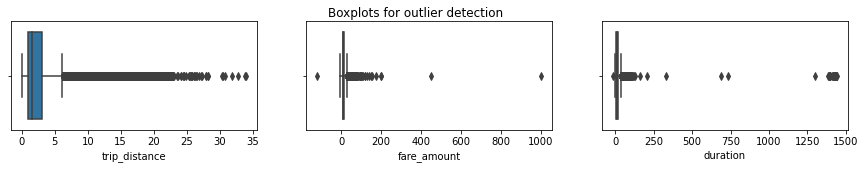

In [12]:
fig, axes = plt.subplots(1,3,figsize=(15,2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x= df["trip_distance"])
sns.boxplot(ax=axes[1],x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show()



**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

**The analysis found outliers in three variables: trip_distance, fare_amount, and duration.**

**trip_distance:**

Outliers: Some trips have very long distances, but these are considered believable. It's possible to have long trips within NYC.

Action: We'll leave these values alone, as they likely represent genuine long trips.

**fare_amount:**

Outliers: Some trips have extremely high fares. While fares can vary, there's a limit to how expensive a taxi ride within NYC is likely to be. Extremely high fares might be due to errors or unusual circumstances.

Action: We'll need to investigate these outliers further to understand if they are valid or need adjustment.

**duration:**

Outliers: Some trips have extremely long durations. Similar to fares, there's a reasonable limit to how long a taxi trip within NYC should take. Extremely long durations might indicate errors or unusual events (e.g., a traffic jam, a detour).

Action: We'll need to investigate these outliers to determine if they are valid or need adjustment.

**Zero or negative values (all variables):**

trip_distance: A trip can't have zero  distance.

fare_amount: A taxi ride can't cost zero or negative dollars.

duration: A trip can't take zero or negative time.

Action: These values are likely errors and need to be addressed (e.g., by removing them or imputing with more reasonable values).


**We need to investigate and potentially adjust outliers in fare_amount and duration, as well as any values of 0 or less in all three variables. This will help ensure that our analysis and modeling are based on reliable and accurate data.**

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [13]:
# Are trip distances of 0 bad data or very short trips rounded down?

sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [14]:
sum(df['trip_distance']==0)

148

*  The 148 trips with a trip_distance of 0 are relatively insignificant compared to the total number of trips (~23,000). While we could impute these values with a small positive value like 0.01, it's unlikely to have a major impact on the model's performance. Therefore, the decision is to leave the trip_distance column as is and not make any adjustments for these outliers.

#### `fare_amount` outliers

In [15]:
### YOUR CODE HERE ###
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?


**There are a few key observations about the fare_amount column:**

* Negative Fare (-120.00) , This is unrealistic and likely an error or incorrect data entry.
* Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.
* Extremely High Fare (999.99) , This may be an outlier and should be checked.
* High Standard Deviation (13.24) , Indicates significant variation in fare amounts.
* The large gap between the mean (13.03) and max (999.99) suggests potential outliers.
* The Interquartile Range (IQR) for fare_amount is 8, calculated as Q3 - Q1. Using the standard method (Q3 + 1.5 * IQR), the upper limit for outliers is 26.50.  However, this seems too low for realistic taxi fares. So, we adjust the factor from 1.5 to 6, resulting in an upper limit of 62.50, which is a more reasonable cap for fare amounts, preventing unrealistic fares like $999.99.

**Impute values less than $0 with 0.**


In [16]:
# Impute values less than $0 with 0
df.loc[df['fare_amount']<0, 'fare_amount']=0
df['fare_amount'].min()
       

0.0

**Now impute the maximum value as `Q3 + (6 * IQR)`.**

In [17]:
# This function imputes outlier values in the specified columns of the DataFrame based on the Interquartile Range (IQR).
# It first handles negative values by setting them to zero,
# then calculates the upper threshold for outliers using a customizable IQR factor.
# Any value above this threshold is replaced by the threshold value.
# The function works on each column in the provided list and updates the DataFrame in place.

#Function to handle outliers in specified columns.
def outlier_imputer(column_list, iqr_factor):   
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    
    
    
    # Loop through the columns in the list
    for col in column_list:
        
            # Reassign minimum to zero
            df.loc[df[col] < 0, col] = 0
            
         
            # Calculate the first (Q1) and third (Q3) quartiles
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            
            # Calculate the Interquartile Range (IQR)
            iqr = q3-q1
            
            # Calculate the upper threshold for outliers based on the IQR and the adjustment factor
            upper_threshold = q3+ (iqr_factor*iqr)
            
            # Print the column name, Q3, and the calculated upper threshold
            print(col)
            print('q3:', q3)
            print('upper_threshold:', upper_threshold)
      
           
            # Reassign values greater than the upper threshold to the upper threshold value
            df.loc[df[col]>upper_threshold, col] = upper_threshold
            # Print the summary statistics of the column after adjustments
            print(df[col].describe()) 
            print() # Add a blank line for better readability
            
    

In [18]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers


In [19]:
# Call .describe() for duration outliers
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [20]:
# Impute a 0 for any negative values
df.loc[df['duration']<0 , 'duration'] = 0
df['duration'].min()

0.0

In [21]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [22]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] =df['PULocationID'].astype(str) +" "+df['DOLocationID'].astype(str)
df['pickup_dropoff'].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [23]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped.head(5)

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [24]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [25]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [26]:
# Step 1: Group the dataframe by the 'pickup_dropoff' column and calculate the mean duration for each group
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

# Step 2: Convert the grouped DataFrame into a dictionary
# The keys of the dictionary will be 'pickup_dropoff' combinations, 
# and the values will be the corresponding mean 'duration' values for those combinations.
grouped_dict = grouped.to_dict()

# Step 3: Extract the 'duration' column from the dictionary
# The outer key is 'duration', so we access it to get the actual dictionary that contains the mean durations for each pickup_dropoff pair.
grouped_dict = grouped_dict['duration']

# Step 4: Create a new column 'mean_duration' in the original dataframe 
# This column will initially be a copy of the 'pickup_dropoff' column
df['mean_duration'] = df['pickup_dropoff']

# Step 5: Use the map() method to replace the 'pickup_dropoff' values with the corresponding mean duration values
# The map() method will look up the value for each 'pickup_dropoff' pair from the 'grouped_dict' dictionary and assign it to the 'mean_duration' column.
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Step 6: Confirm that the mapping worked correctly by checking the mean_duration for a specific pair of pickup and dropoff locations
# In this case, we are checking for rows where PULocationID is 100 and DOLocationID is 231.
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [27]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month']= df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [28]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [29]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val  

In [30]:
# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

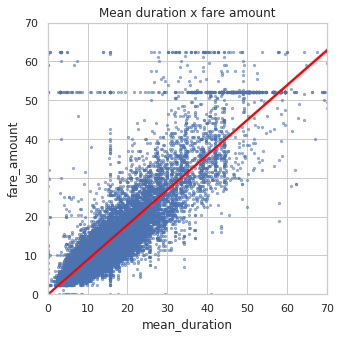

In [31]:
# Create a scatterplot to visualize the relationship between variables of interest

sns.set(style='whitegrid')  # Set a clean, white grid background for the plot

f = plt.figure()  # Create a figure object
f.set_figwidth(5)  # Set figure width to 5 inches
f.set_figheight(5)  # Set figure height to 5 inches

sns.regplot(x=df['mean_duration'], y=df['fare_amount'],  # Create a regression plot
            scatter_kws={'alpha':0.5, 's':5},  # Set scatter plot transparency (alpha) and size (s)
            line_kws={'color':'red'})  # Set regression line color to red

plt.ylim(0, 70)  # Set y-axis limit between 0 and 70
plt.xlim(0, 70)  # Set x-axis limit between 0 and 70
plt.title('Mean duration x fare amount')  # Add a title to the plot
plt.show()  # Display the plot
        

**In the scatter plot, we see two horizontal lines where many data points are aligned:**

**At $62.50:**

* This is expected because we capped outliers at $62.50 when handling fare amount outliers.

* Any fare that was originally above this threshold is now set to $62.50, causing a flat line in the plot.

**At around $52:**

* We need to check why this value appears frequently.

* It could be a fixed fare amount

**How to check:**
We can filter the dataset to see how many rides have a fare of exactly $52 and investigate why this occurs.

df[df['fare_amount'] == 52]

But, here, we check df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()


In [32]:

# Check the value of the rides in the second horizontal line in the scatter plot.

df[df['fare_amount']>50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [33]:

# This line ensures that all columns of the DataFrame are displayed, even if there are many.
pd.set_option('display.max_columns', None) 

# Display the first 30 rows where the fare amount is exactly 52
df[df['fare_amount'] == 52].head(30) 

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


**Question:** What do you notice about the first 30 trips?

Many trips with a fare of $52 either start or end at location 132, and all of them have a RatecodeID of 2.

At first, it’s unclear why location 132 has so many trips with this exact fare. These trips happen on different days, at different times, with both vendors, and in all months. However, many of them include toll amounts of $5.76 or $5.54, suggesting that this location is in an area where tolls are common. This makes it likely that location 132 is an airport.

According to the data dictionary, RatecodeID 2 refers to trips related to JFK Airport (John F. Kennedy International Airport). A quick Google search confirms that in 2017, NYC taxis had a flat fare of $52 for trips between JFK Airport (Queens) and Manhattan.

RatecodeID 2 means the trip follows a fixed fare for JFK Airport rides. After making predictions, we can restore this fixed fare to ensure accuracy.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [35]:
df2 = df.copy()
df2 = df2.drop(['Unnamed: 0','tpep_pickup_datetime','tpep_dropoff_datetime',
                'trip_distance','RatecodeID','store_and_fwd_flag',
                'PULocationID','DOLocationID',
               'payment_type','extra', 'mta_tax',
                'tip_amount','tolls_amount', 'improvement_surcharge', 
                'total_amount','duration', 'pickup_dropoff','day','month'],axis=1)
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

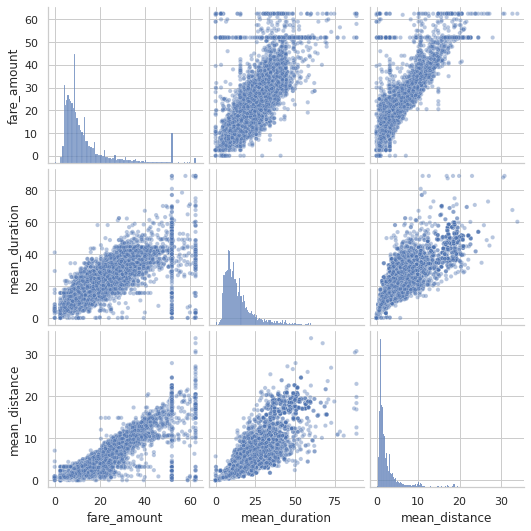

In [36]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],plot_kws={'alpha':0.4, 'size':5})

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [37]:
# Correlation matrix to help determine most correlated variables
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


In [38]:
print(df2.corr(method='pearson').to_csv())

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.0,0.26646321339067147,0.0010452538428770573,0.004740820009934476,0.0018762596908186767,-0.002873800102198543
passenger_count,0.26646321339067147,1.0,0.014941609326788233,0.01342763726664352,0.015852073557633503,-0.022035171712455292
fare_amount,0.0010452538428770573,0.014941609326788233,1.0,0.9101854602134332,0.8591054447614108,-0.020075469426999285
mean_distance,0.004740820009934476,0.01342763726664352,0.9101854602134332,1.0,0.8748640408470973,-0.039725371388227404
mean_duration,0.0018762596908186767,0.015852073557633503,0.8591054447614108,0.8748640408470973,1.0,-0.021582769345393524
rush_hour,-0.002873800102198543,-0.022035171712455292,-0.020075469426999285,-0.039725371388227404,-0.021582769345393524,1.0



Visualize a correlation heatmap of the data.

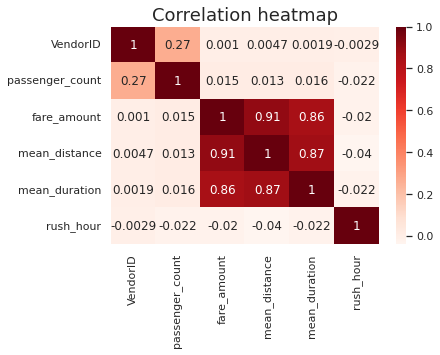

In [39]:
# Create correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'),annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Mean duration and mean distance are both strongly related to fare amount. They also have a high correlation with each other (0.87).

In linear regression, highly correlated predictors can be a problem if you want to understand the impact of each variable. However, if accurate predictions are more important than interpretation, using correlated variables is fine.

Since the goal is to predict fare amount for machine learning models, it's worth testing the model with both variables, even though they are correlated.

Therefor, Try modeling with both variables even though they are correlated.

**Even though rush_hour has a weak correlation with fare_amount and others, it might still impact fares in non-linear ways. So, we keep it in the model**

A non-linear relationship means that the effect of one variable on another isn’t a constant, straight-line change. For example, during rush hour, fares might not always increase by the same amount; the effect could be small at some times and larger at others depending on conditions like traffic congestion. So, even if the direct (linear) correlation is weak, rush_hour could still impact fares in more complex, non-linear ways.

Even though VendorID and passenger_count show weak individual correlations with fare_amount, they may still add value in the model.Their impact might be non-linear or only noticeable under certain conditions, which a machine learning model can capture even if a simple correlation measure doesn't show it strongly.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [40]:
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [41]:
# Remove the target column from the features
X = df2.drop(columns='fare_amount')

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

Although VendorID is stored as an integer, we know it represents a categorical variable.

Converting it to a string makes it clear that the variable is categorical and should be treated as such.

In [42]:
# Convert the 'VendorID' column to a string data type.
# Although VendorID is stored as an integer, it actually represents a categorical variable (e.g., different taxi companies).
X['VendorID'] = X['VendorID'].astype(str)

# Convert all categorical variables in DataFrame X to dummy variables.
# pd.get_dummies() creates new binary columns (0 or 1) for each category.
# 'drop_first=True' drops the first category of each variable to avoid multicollinearity.
X['VendorID'] = pd.get_dummies(X['VendorID'], drop_first=True)

# Display the first few rows of the updated DataFrame to verify the changes.
X.head()



,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,1,6,3.521667,22.847222,0
1,0,1,3.108889,24.470370,0
2,0,1,0.881429,7.250000,1
3,1,1,3.700000,30.250000,0
4,1,1,4.435000,14.616667,0


In [43]:
print(X['VendorID'].dtype)

uint8


When  dummy encode a categorical variable with only two categories (like VendorID converted to 0 and 1), the resulting column is numeric (0s and 1s) and often stored as uint8.So, our VendorID column has been converted into a dummy variable.

### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [44]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

**Equal Weight for All Features:** Standardization ensures that features are on a similar scale so that one feature doesn't dominate others due to its scale.
**Improved Model Performance** Perform better when the data is standardized.

In [45]:
# Standardize the X variables

# Create a StandardScaler object and fit it to the training features.
# This calculates the mean and standard deviation for each feature in X_train.
scaler = StandardScaler().fit(X_train)

# Use the scaler to transform X_train.
# This standardizes the features by subtracting the mean and dividing by the standard deviation,
# resulting in each feature having a mean of 0 and a standard deviation of 1.
X_train_scaled = scaler.transform(X_train)

# Print the standardized training data to verify the transformation.
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 0.89286563 -0.50301524  0.8694684   0.17616665 -0.64893329]
 [ 0.89286563 -0.50301524 -0.60011281 -0.69829589  1.54099045]
 [-1.11998936  0.27331093 -0.47829156 -0.57301906 -0.64893329]
 ...
 [-1.11998936 -0.50301524 -0.45121122 -0.6788917  -0.64893329]
 [-1.11998936 -0.50301524 -0.58944763 -0.85743597  1.54099045]
 [ 0.89286563  1.82596329  0.83673851  1.13212101 -0.64893329]]


### Fit the model

Instantiate your model and fit it to the training data.

In [46]:
# Fit your model to the training data

# Instantiate the model:
# Create an instance of the LinearRegression model with default settings.
# This step allocates memory and initializes the model's internal parameters.
lr = LinearRegression()  

# Fit the model to the training data:
# The fit() method is an instance method, so it must be called on the model instance 'lr'.
# This trains the model by finding the best-fitting line through the data (X_train_scaled) to predict y_train.
lr.fit(X_train_scaled, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [47]:
# Evaluate the model performance on the training data

# we use two  methods are used to calculate R² for Cross-Verification:

#  Method 1 : Using the model's score() method.
# lr.score() takes in the features (X_train_scaled) and the true target values (y_train),
# automatically makes predictions internally, and then computes R² by comparing these predictions to y_train.
r_sq = lr.score(X_train_scaled, y_train)
print("Coefficient of determination (R²) using lr.score:", r_sq)

# Method 2 : Using the r2_score() function.
# First, we manually predict the target values using the model:
y_pred_train = lr.predict(X_train_scaled)
# Then, we pass the actual values (y_train) and the predicted values (y_pred_train) to r2_score() to compute R².
r2 = r2_score(y_train, y_pred_train)
print("Coefficient of determination (R²) using r2_score:", r2)

# Both methods ultimately compare the predicted values to the actual values,
# but lr.score() does the prediction step for you automatically.


# Calculate and print the Mean Absolute Error (MAE)
print('MAE:', mean_absolute_error(y_train, y_pred_train))

# Calculate and print the Mean Squared Error (MSE)
print('MSE:', mean_squared_error(y_train, y_pred_train))

# Calculate and print the Root Mean Squared Error (RMSE)
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination (R²) using lr.score: 0.8398434585044773
Coefficient of determination (R²) using r2_score: 0.8398434585044773
MAE: 2.1866664167754135
MSE: 17.88973296349268
RMSE: 4.229625629236313


**R²**

Maximum Value: The best R² can be is 1.0 (or 100%).

Our Model: With an R² of 0.84, the model explains 84% of the variance in the target variable.

Comparison: A perfect model (with no error) would score 1.0, so our 0.84 is close to that ideal.


**MAE (Mean Absolute Error):**

Best case: MAE = 0 (perfect predictions). Here, our model's MAE is 2.19, meaning on average, the predictions are off by $2.19 from the actual fares.

**MSE (Mean Squared Error):**

Best case: MSE = 0 (perfect predictions).
In our case, the MSE is 17.89. This metric squares the errors, so larger mistakes have a bigger impact.

**RMSE (Root Mean Squared Error):**

Best case: RMSE = 0 (perfect predictions).
Our model's RMSE is 4.23, which gives the average error in the same units as the target variable (dollars).

### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [48]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [49]:
# Evaluate the model performance on the testing data
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593864
MSE: 14.326454156998944
RMSE: 3.785030271609323


T**he results for the test set are:**

Coefficient of determination (R²): 0.8683

MAE: 2.13

MSE: 14.33

RMSE: 3.79

**Comparing with the Training Data:**

Training R²: ~0.84

Training MAE: ~2.19

Training MSE: ~17.89

Training RMSE: ~4.23

**Conclusion:**

    * Slightly Better Test Performance: The test R² (0.8683) is a bit higher than the training R² (0.84), and the error metrics (MAE, MSE, RMSE) are lower on the test set.

    * Good Generalization:This indicates that the model performs well on unseen data and is not overfitting.

    * Consistent Results:The model's performance is consistent between training and testing, suggesting it has learned a reliable relationship between the features and the target variable.

**Overall, the model generalizes well and can be expected to perform reliably on new data.**

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [50]:
# Create a `results` dataframe

# This further confirms that the analysis (i.e., comparing actual vs. predicted values)
# This is based on the test data.

# Create a DataFrame to compare actual vs. predicted values for the test set

# ravel() is a NumPy method that converts a multi-dimensional array into a 1D array.
# For example, if y_pred_test is a column vector (shape: (n, 1)),
# y_pred_test.ravel() turns it into a simple 1D list of values (shape: (n,)).
# Syntax: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
# data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}


results = pd.DataFrame(data={'actual': y_test['fare_amount'],  
                             'predicted': y_pred_test.ravel() }) # y_pred_test = lr.predict(X_test_scaled)

# Calculate residuals: the difference between actual and predicted values
results['residual'] = results['actual'] - results['predicted']

# Display the first few rows of the results DataFrame
print(results.head())





       actual  predicted   residual
5818     14.0  12.356503   1.643497
18134    28.0  16.314595  11.685405
4655      5.5   6.726789  -1.226789
7378     15.5  16.227206  -0.727206
13914     9.5  10.536408  -1.036408


* A positive residual  means the model under-predicted the fare.
* A negative residual  means the model over-predicted the fare.
* This snapshot indicates that while the model generally makes reasonable predictions, there are individual cases (like row 18134) where the prediction error is high. This could be due to outliers or specific trip characteristics that the model doesn't fully capture.
* this dataframe helps you see both the direction (over- or under-prediction) and the size of the errors for individual test samples.

### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

Text(0.5, 1.0, 'Actual vs. Predicted')

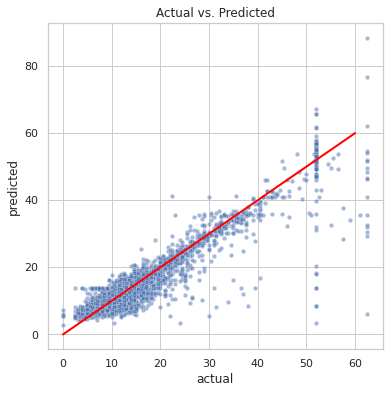

In [52]:
# Create a scatterplot to visualize `predicted` over `actual`


fig, ax = plt.subplots(figsize=(6, 6))# Create a figure and axis for the scatterplot with a fixed size (6x6 inches)

sns.set(style='whitegrid')# Set the Seaborn style to 'whitegrid' for a clean background with gridlines


# Create a scatterplot to visualize predicted values versus actual values.
# x='actual' and y='predicted' specify which columns to plot from the 'results' DataFrame.
# s=20 sets the marker size, and alpha=0.5 makes the markers semi-transparent.
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax)

# Draw a diagonal line (x = y) from (0, 0) to (60, 60) in red with a line width of 2.
# Since we know that a perfect prediction means predicted = actual,
# we manually draw this diagonal line using plt.plot().
# This line helps visually compare how well the model's predictions match the actual values.
# If all points lie on this line, the model would be perfect; deviations indicate prediction errors.
plt.plot([0, 60], [0, 60], c='red', linewidth=2)


# Add a title to the plot
plt.title('Actual vs. Predicted')


* Since we know that a perfect prediction means predicted = actual, we manually draw a diagonal line from (0,0) to (60,60) using plt.plot([0,60], [0,60], c='red', linewidth=2). This line helps visually compare how well the model's predictions match the actual values. If all points lie on this line, the model is perfect. If they deviate, the model has some error.

Visualize the distribution of the `residuals` using a histogram.

Text(0, 0.5, 'count')

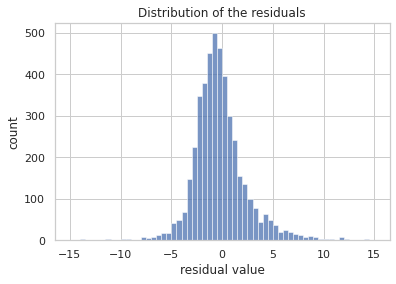

In [53]:
# Visualize the distribution of the `residuals`

# 'bins=np.arange(-15, 15.5, 0.5)' creates an array of bin edges starting at -15, ending at 15.5, with intervals of 0.5.
sns.histplot(results['residual'], bins=np.arange(-15, 15.5, 0.5))# results['residual'] = results['actual'] - results['predicted']


plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count')




In [55]:
# Calculate residual mean
results['residual'].mean()

-0.015442621528680731

* The result of results'residual'.mean() is approximately 0.015, which is very close to zero. 

* Mean near Zero: A mean residual close to zero indicates that, on average, the model's prediction errors cancel out. This means the model doesn't consistently over-predict or under-predict.

* Having a mean residual near zero and an approximately normal residual distribution means that the model's errors are random and unbiased, which is desirable for a reliable model.

Create a scatterplot of `residuals` over `predicted`.

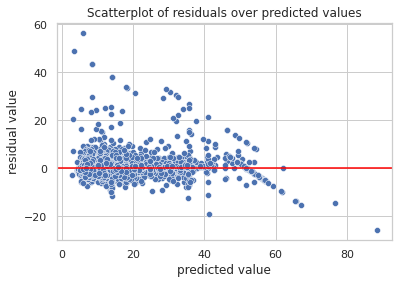

In [56]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
# Draw a horizontal red line at y=0.
# This line represents the point of zero error (no residual).
# It helps visually assess whether the residuals are evenly distributed around zero.
plt.axhline(0, c='red')

plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

* The residual plot shows that most errors are evenly spread above and below zero, which means the model doesn't consistently over- or under-predict. The noticeable sloping lines—from the upper-left to the lower-right—are due to the fixed values we set: one at 62.50 (the imputed maximum) and one at 52 (the flat fare for JFK trips). These fixed fares cause many residuals to line up at those values.


### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [58]:
# Output the model's coefficients
#  Syntax: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
coefficients = pd.DataFrame(data=lr.coef_, columns=X.columns)
coefficients

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,-0.054373,0.030825,7.133867,2.812115,0.110233


What do these coefficients mean? How should they be interpreted?

* The coefficients reveal that mean_distance was the feature with the greatest weight in the model's final prediction. Be careful here! **A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of 7.13. This is incorrect.** **Remember, the data used to train the model was standardized with StandardScaler().** As such, the units are no longer miles. In other words, you cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, for every +1 change in standard deviation, the fare amount increases by a mean of 7.13.

* When predictors are highly correlated, the standard errors tend to be larger, which leads to wider confidence intervals. Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

**So, translate this back to miles instead of standard deviation (i.e., unscale the data).**

Calculate the standard deviation of mean_distance in the X_train data.

Divide the coefficient (7.133867) by the result to yield a more intuitive interpretation.

* Because our model's coefficients are based on standardized data. The standard deviation tells us the spread of the original data.

* So, we divide by the standard deviation:Dividing the coefficient by the standard deviation converts its effect from a "per standard deviation" change to a "per original unit" change, making it easier to interpret.

In [59]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.574812975256415
1.9955916713344426


Now we can make a more intuitive interpretation: for every 3.57 miles traveled, the fare increased by a mean of dollar 7.13. Or, for every 1 mile traveled, the fare increased by a mean of $ 2.00.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?

   * Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
   * Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
   * Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions (or not, depending on our use case).



2. What results can be presented from this notebook?

   * We can discuss meeting linear regression assumptions, and We can present the MAE and RMSE scores obtained from the model.

# BONUS CONTENT

More work must be done to prepare the predictions to be used as inputs into the model for the upcoming course. This work will be broken into the following steps:

1. Get the model's predictions on the full dataset.

2. Impute the constant fare rate of \$52 for all trips with rate codes of `2`.

3. Check the model's performance on the full dataset.

4. Save the final predictions and `mean_duration` and `mean_distance` columns for downstream use.



In [61]:
# Scale the full dataset X using the pre-fitted StandardScaler to ensure it has the same scale as the training data.
X_scaled = scaler.transform(X)

# Use the trained LinearRegression model to predict the target variable (fare amount) for the full, scaled dataset.
y_preds_full = lr.predict(X_scaled)

### 2. Impute ratecode 2 fare

The data dictionary says that the `RatecodeID` column captures the following information:

1 = standard rate  
2 = JFK (airport)  
3 = Newark (airport)  
4 = Nassau or Westchester  
5 = Negotiated fare  
6 = Group ride  

**This means that some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of `2` can be imputed with \$52, as this is a flat rate for JFK airport.**

The other rate codes have some variation (not shown here, but feel free to check for yourself). They are not a fixed rate, so these fares will remain untouched.

Impute `52` at all predictions where `RatecodeID` is `2`.

In [62]:
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


### Check performance on full dataset

In [63]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683975
MAE: 1.992506252269974
MSE: 12.101575504689935
RMSE: 3.4787318816905013


Save final predictions with mean_duration and mean_distance columns

In [64]:
# Combine means columns with predictions column
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


**In the bonus part, we took a simplified approach:**

Prediction on the Full Dataset:
We first used our trained model to predict fares for all rides in the dataset, including those with RatecodeID 2.

Manual Imputation for Fixed Fare Rides:
After obtaining predictions, we replaced the predicted values with dollar 52 for any ride that had a RatecodeID of 2 (which indicates a fixed fare for JFK trips).

This means:
We predicted fares for everything, then corrected the predictions for the rides with a fixed rate.

**Best Practice (Ideal Way):**

Separate the Data: Remove rides with RatecodeID 2 before training, since their fare is known (always 52).

Train the Model: Train the model only on rides that require prediction (i.e., rides without RatecodeID 2).

Post-Prediction: After training, add the fixed-rate rides back into the dataset with their known fare (52).

This approach prevents the model from learning on data that already have a predetermined fare, which can lead to a more accurate and interpretable model.








**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 